In [1]:
import pandas as pd
from utils import load_and_prepare_building_dfs
building_dfs = load_and_prepare_building_dfs(esave_path="data/EsaveExport_Trondheim Kommune_Trondheim_10121314.xls", vis_path='data/VIS Målere.xlsx')

anomalies = pd.read_excel('data/anomaly_confidence.xlsx', decimal=',')
anomalies.rename(columns={anomalies.columns[0]: 'datetime'}, inplace=True)
anomalies['datetime'] = pd.to_datetime(anomalies['datetime'], dayfirst=True)
anomalies.set_index('datetime', inplace=True)
anomalies.sort_index()

anomalies

Data loaded in 79.78085970878601 seconds


,Trondheim Kommune - General Wibes veg 1,Trondheim Kommune - Spongdal skole og Byneshallen,Trondheim Kommune - Ladesletta helse- og velferdssenter,Trondheim Kommune - Leangen Ishall,Trondheim Kommune - Åsveien skole og Åsveihallen,Trondheim Kommune - Spongdal skole,Trondheim Kommune - Trondheim Hovedbrannstasjon (Sluppen),Trondheim Kommune - Stavset bskole,Trondheim Kommune - Brøset Interim skole,Trondheim Kommune - Lilleby skole,...,Trondheim Kommune - Charlottenlund barnehage,Trondheim Kommune - Cecilienborg barnehage,Trondheim Kommune - Brøset Prestekragen barnehage,Trondheim Kommune - Brøset Marikåpa barnehage,Trondheim Kommune - Bromstad barnehage,Trondheim Kommune - Brinken barnehage,Trondheim Kommune - Breidablikk barnehage,Trondheim Kommune - Brannhaugen Barnehage,Trondheim Kommune - Blomsterbyen barnehage,Trondheim Kommune - Angelltrøa barnehage
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-01,0.06,0.07,0.41,0.00,0.02,0.07,0.19,0.25,0.08,0.09,...,0.01,0.32,0.16,0.04,0.02,0.02,0.06,0.08,0.02,0.05
2015-01-02,0.09,0.06,0.55,0.03,0.02,0.06,0.10,0.24,0.04,0.06,...,0.02,0.36,0.02,0.03,0.01,0.02,0.02,0.08,0.02,0.03
2015-01-03,0.15,0.08,0.67,0.04,0.03,0.08,0.13,0.11,0.02,0.12,...,0.00,0.43,0.00,0.00,0.02,0.02,0.01,0.04,0.01,0.03
2015-01-04,0.07,0.07,0.36,0.01,0.01,0.07,0.09,0.27,0.22,0.14,...,0.05,0.45,0.00,0.00,0.02,0.02,0.05,0.06,0.01,0.02
2015-01-05,0.02,0.03,0.09,0.07,0.00,0.03,0.04,0.37,0.58,0.00,...,0.09,0.09,0.04,0.00,0.01,0.03,0.09,0.04,0.02,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-28,0.02,0.23,0.05,0.03,0.01,0.23,0.51,0.16,0.00,0.04,...,0.04,0.09,0.00,0.00,0.00,0.02,0.00,0.06,0.03,0.01
2019-12-29,0.00,0.17,0.01,0.05,0.02,0.17,0.05,0.15,0.02,0.03,...,0.05,0.03,0.06,0.02,0.01,0.03,0.18,0.11,0.08,0.01
2019-12-30,0.01,0.18,0.08,0.02,0.03,0.18,0.01,0.16,0.04,0.01,...,0.04,0.04,0.06,0.08,0.03,0.07,0.39,0.15,0.08,0.03


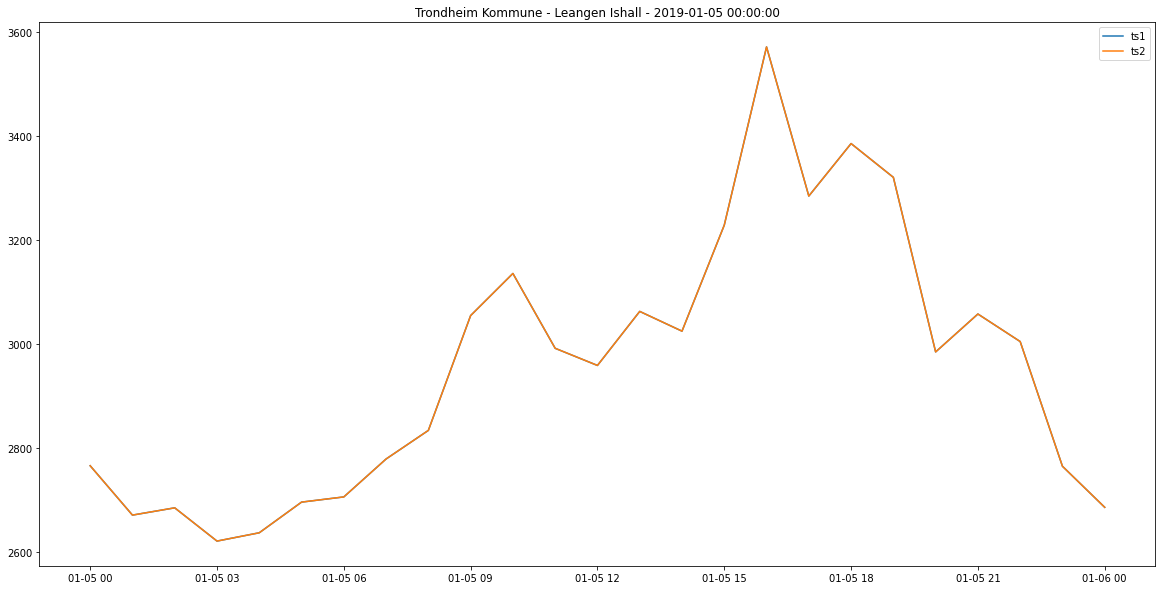

start: 2019-01-05 00:00:00 	 end: 2019-01-06 00:00:00 	 distance: 0.0


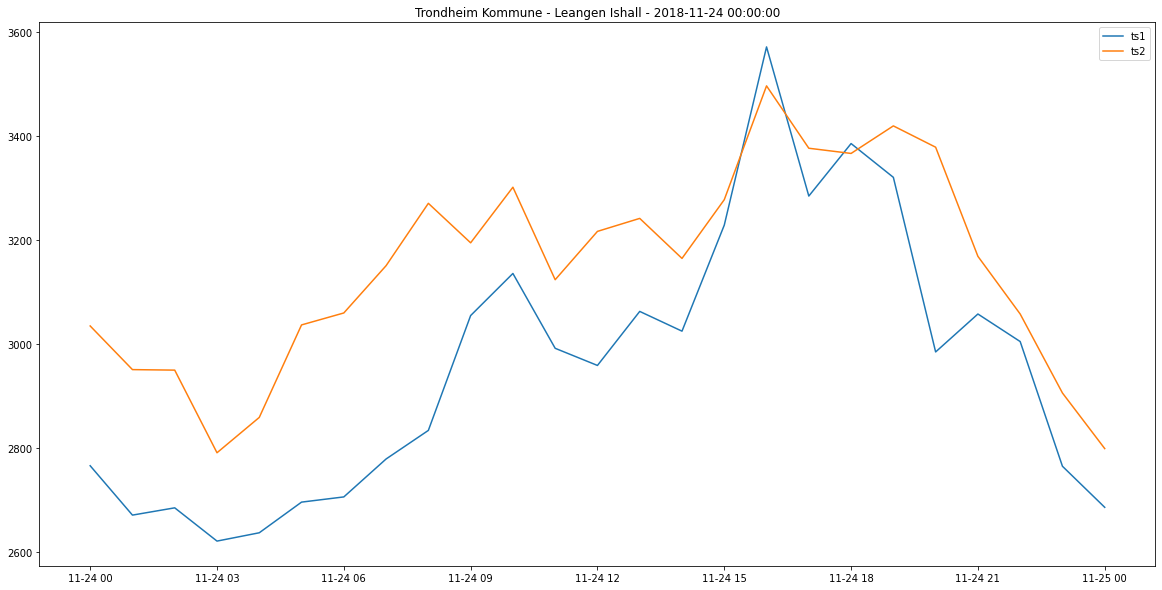

start: 2018-11-24 00:00:00 	 end: 2018-11-25 00:00:00 	 distance: 595.9555352540993


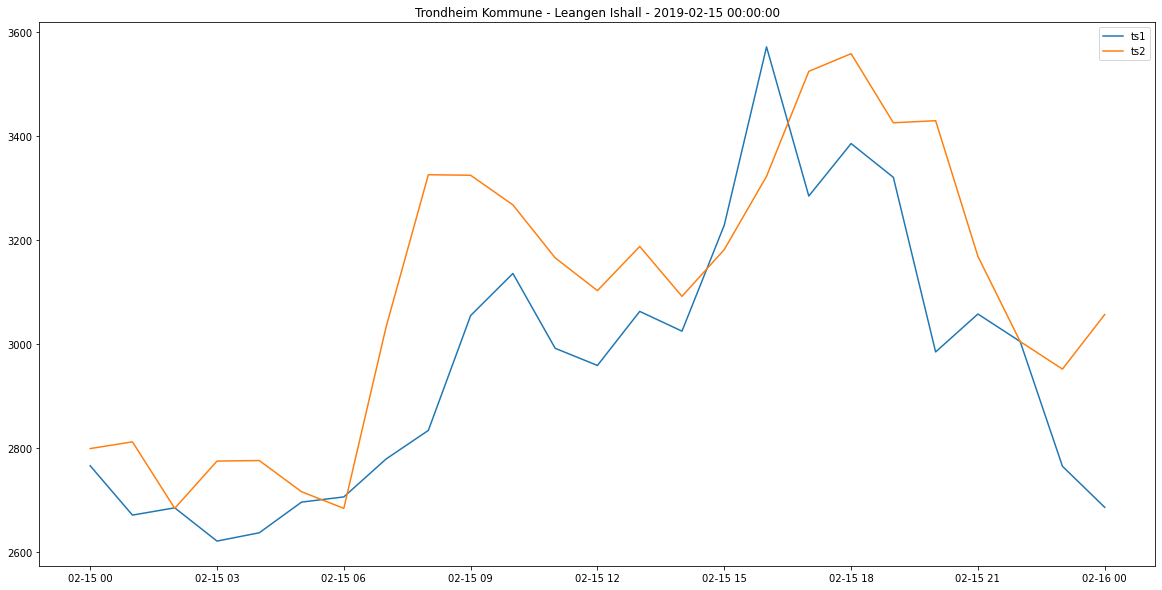

start: 2019-02-15 00:00:00 	 end: 2019-02-16 00:00:00 	 distance: 592.0244927365759


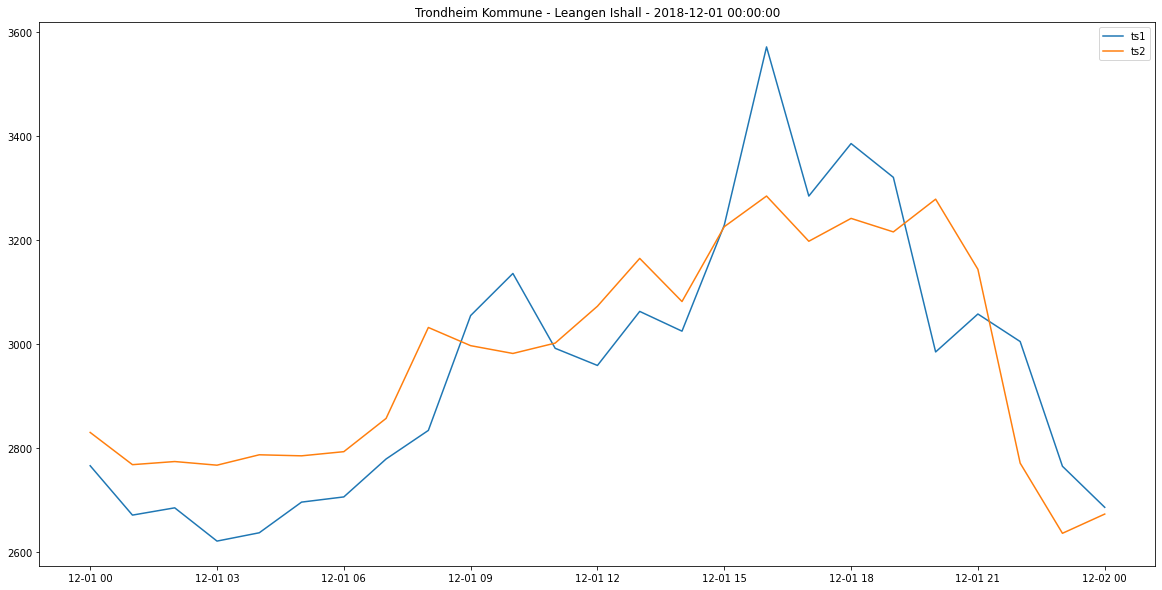

start: 2018-12-01 00:00:00 	 end: 2018-12-02 00:00:00 	 distance: 503.3058203518021


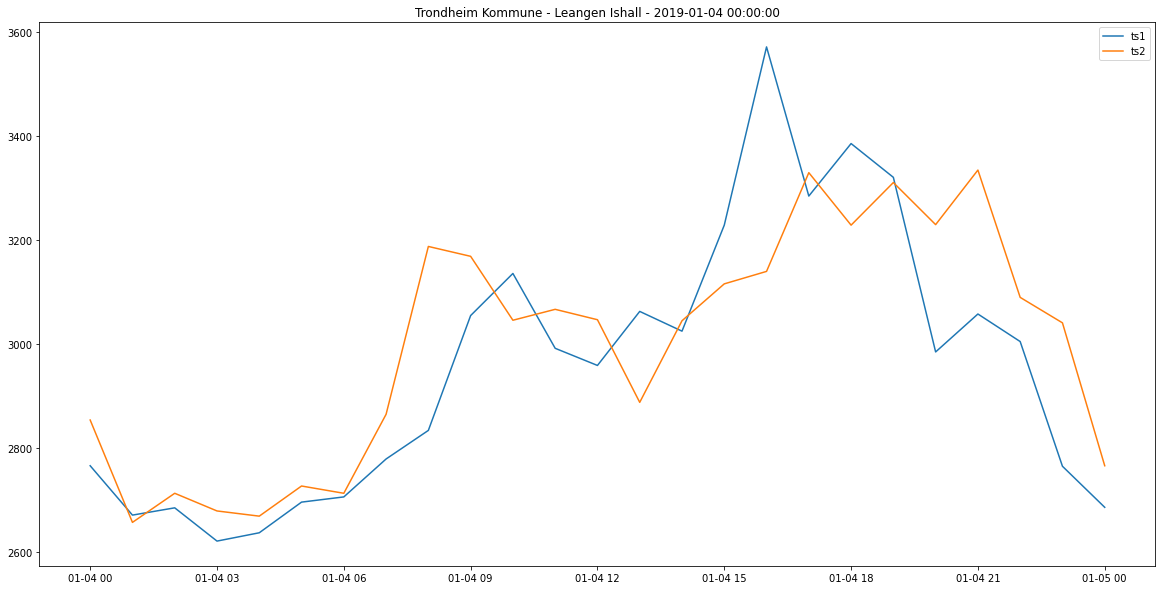

start: 2019-01-04 00:00:00 	 end: 2019-01-05 00:00:00 	 distance: 395.73349618145795


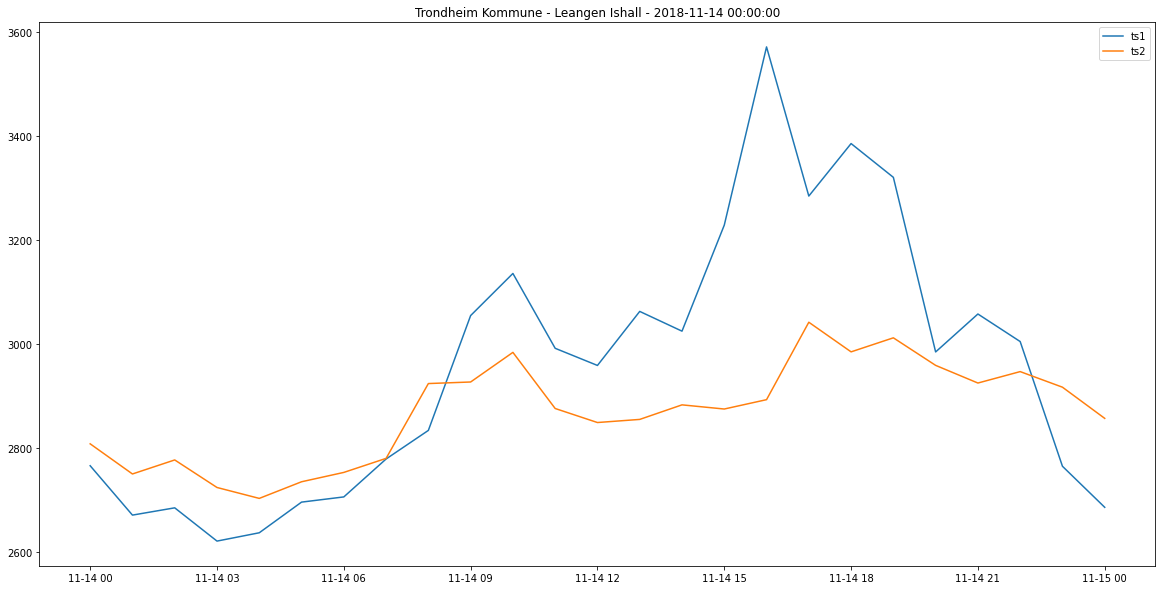

start: 2018-11-14 00:00:00 	 end: 2018-11-15 00:00:00 	 distance: 846.4835403006957


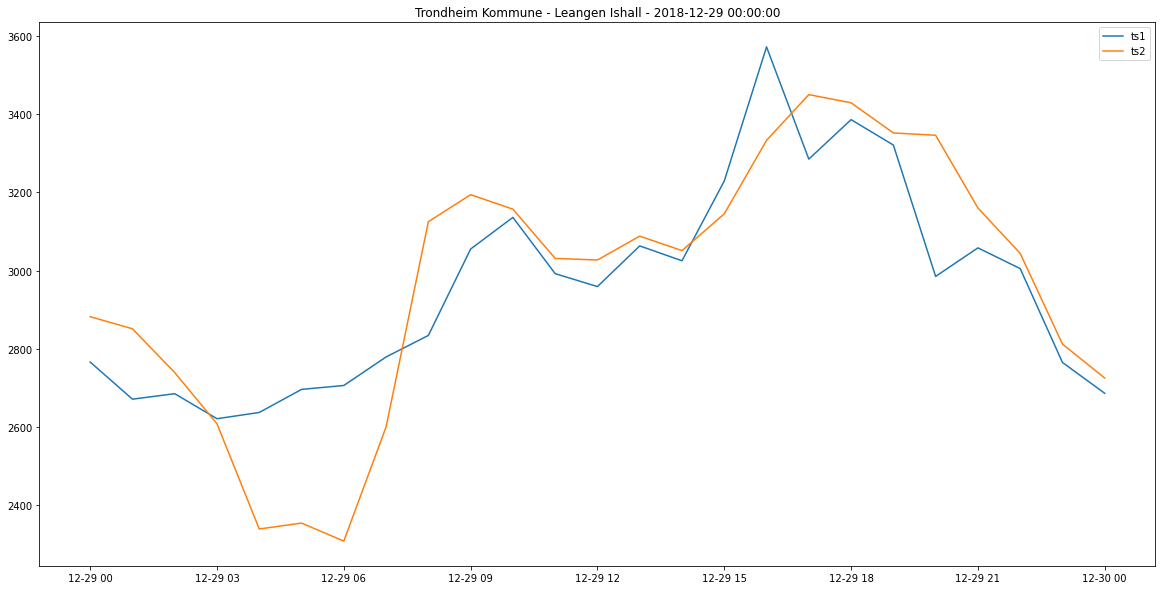

start: 2018-12-29 00:00:00 	 end: 2018-12-30 00:00:00 	 distance: 701.4720236759268


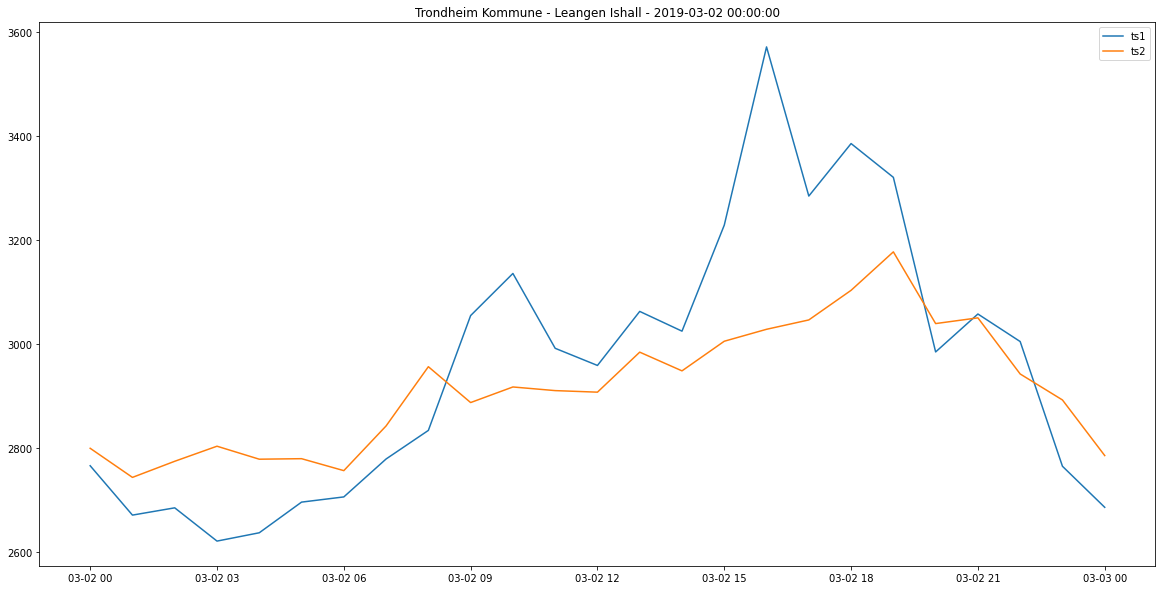

start: 2019-03-02 00:00:00 	 end: 2019-03-03 00:00:00 	 distance: 608.4715110011311


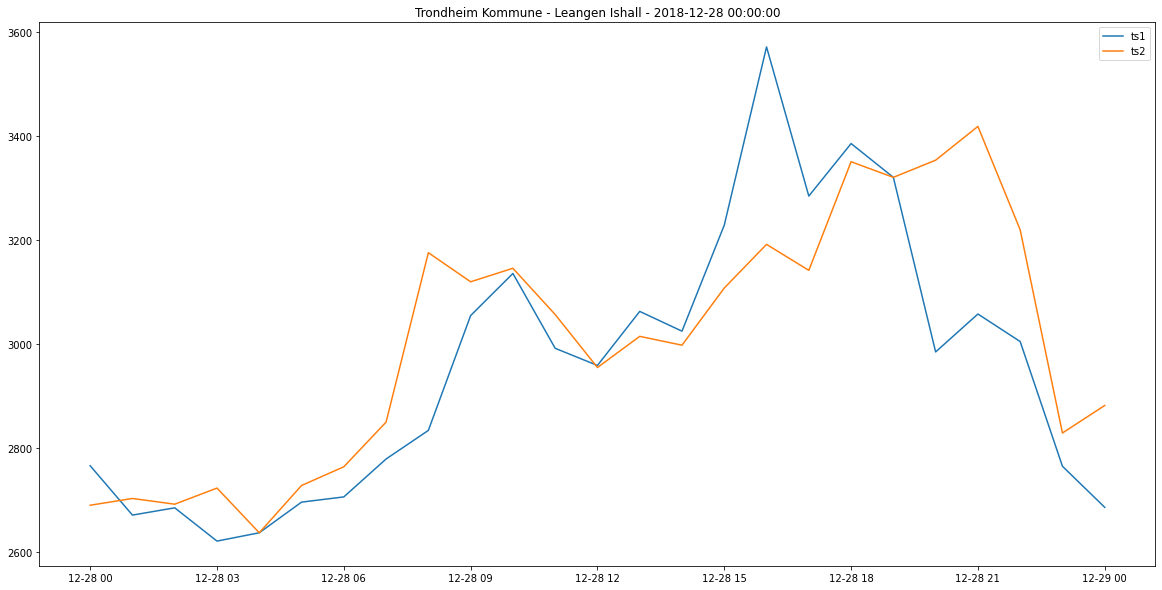

start: 2018-12-28 00:00:00 	 end: 2018-12-29 00:00:00 	 distance: 483.0051759557034


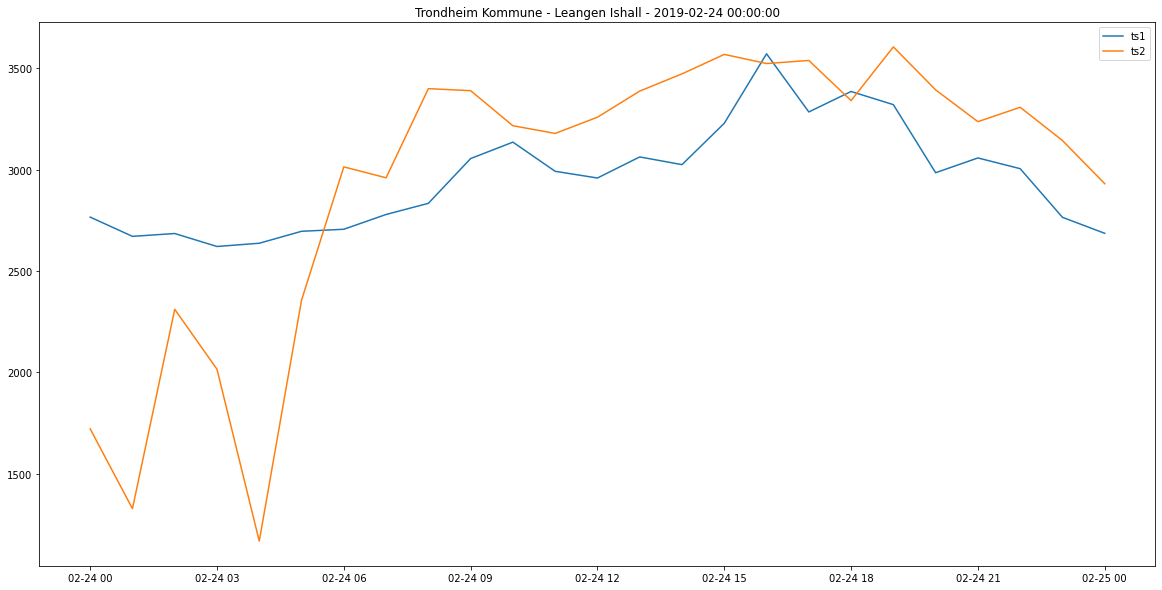

start: 2019-02-24 00:00:00 	 end: 2019-02-25 00:00:00 	 distance: 2480.0072580538954


In [44]:
building = list(building_dfs.keys())[3]
example_building = anomalies[building].copy()
example_building.sort_values(ascending=False, inplace=True)
#print(example_building)
# get 10 most anomalous times
most_deviated_days = example_building.index[:10]
# plot all 24 hours of each 10 days
import matplotlib.pyplot as plt
import datetime
from dtaidistance import dtw

dt_start = datetime.datetime.combine(example_building.index[0], datetime.time.min)
dt_end = dt_start + datetime.timedelta(days=1)
dr = pd.date_range(dt_start, dt_end, freq='H')
ts1 = building_dfs[building]["Totalt"].loc[dr]

for day in most_deviated_days:
    dt_start = datetime.datetime.combine(day, datetime.time.min)
    dt_end = dt_start + datetime.timedelta(days=1)
    
    dr = pd.date_range(dt_start, dt_end, freq='H')
    ts2 = building_dfs[building]["Totalt"].loc[dr]
    # plot ts1 and ts2. let ts1 have same time index as ts2
    # increase plot size
    plt.figure(figsize=(20, 10))
    plt.plot(ts2.index ,ts1.values, label='ts1')
    plt.plot(ts2, label='ts2')
    plt.legend()
    plt.title(f"{building} - {day}")

    distance = dtw.distance(ts1, ts2)
    plt.show()
    print(f"start: {dt_start} \t end: {dt_end} \t distance: {distance}")








